In [2]:
from Bio import SeqIO
import re
pattern = re.compile("[^ARNDCEQGHILKMFPSTWYV]") #no B asaparctic acid or Z glutamic acid (or "X" or "O")
standard = []
non_standard= []
for idx, record in enumerate(SeqIO.parse("combined.fasta", "fasta")):
    if pattern.search(str(record.seq)):
        non_standard.append(record.seq)
    else:
        standard.append(record.seq)

print("Number of sequences with only standard AA's: ",len(standard), "\t Number with non-standard AA's",len(non_standard))

Number of sequences with only standard AA's:  96237 	 Number with non-standard AA's 3507


In [11]:
len(standard) != len(set(standard)) #sets do not allow duplicate values so we check if both lists are the same size

True

In [12]:
import random
#saving the standard AA only list to a new file.
file_name = 'peptide_train.txt'
shuffled_standard = random.sample(standard, len(standard))
with open('peptide_train.txt', 'w') as f:
    for idx,line in enumerate(shuffled_standard):
        if idx <2888:
            continue # the first 20'000 will be used for testing
        f.write(str(line)+'\n')
f.close()

with open('peptide_test.txt', 'w') as f:
    for idx,line in enumerate(shuffled_standard):
        if idx <2888:
            f.write(str(line)+'\n')
        else:
            break
f.close()

with open('peptide_complete.txt', 'w') as f:
    for idx,line in enumerate(shuffled_standard):
        f.write(str(line)+'\n') 
f.close()

In [16]:
#job iD: 1630949481
#http://weizhong-lab.ucsd.edu/cdhit-web-server/cgi-bin/result.cgi?JOBID=1630949481

#save the mean for the cluster as well somewhere 

src = 'cd_hit/sorted_by_size.sorted'
cluster_list = []
tuple_list = []
mean_list = []
idx = 0
with open(src, 'r') as f:
    for line in f:
        if '>Cluster' in line:
            if int(line.strip('>Cluster '))>idx :
                cluster_list.append([tuple_list])
                pct_list = [pct[1] for pct in tuple_list]
                mean_list.append(sum(pct_list)/len(pct_list))
                tuple_list=[]
                idx = idx+1
        else:
            if '*' in line:
                tuple_list.append((line.split('|')[1],float('100')))
                continue
            tuple_list.append((line.split('|')[1],float(line.strip('%\n').split('at ')[1])))


(array([ 485., 2625., 3721., 4651., 5339., 6744., 5562., 4815., 4195.,
        6863.]),
 array([ 52.4484507 ,  57.20360563,  61.95876056,  66.71391549,
         71.46907042,  76.22422535,  80.97938028,  85.73453521,
         90.48969014,  95.24484507, 100.        ]),
 <BarContainer object of 10 artists>)

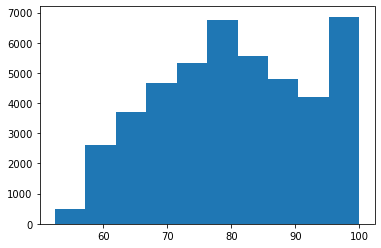

In [22]:
#this shows that increasing the % identity to ~75 would yield more unique peptides, this image does not portray well that
#clusters with lower mean % identity tend to contain a much larger number of proteins.
import matplotlib.pyplot as plt
plt.hist(mean_list[0:45000])

In [1]:
import pandas as pd

df = pd.read_csv("peptide_complete.txt")

In [2]:
df

,peptides
0,GLRKRLRKFRNKPKEKLKKIGQKIQGLLPKLAPRTDY
1,FLGGLMKIIPAAFCAVTKKC
2,WCSTCLDLACGASRECYDPCFKAFGRAHGKCMNNKCRCYT
3,TRQCRRGRIWKRWNETITGP
4,TFFRLFNRGGGKLFKFLRKHLL
...,...
42368,KSRRRQWRMKK
42369,MKLIDATVVLNYIEKTKNELNTTSPANNSKFGKGWDAGFIRGIESI...
42370,TCVGGTCNTPGCTCSWPVCTRNGLPVCGE
42371,DGVKLCEKPSQTWTGNCGNTKHCDTQCRNWEGAKHGACHKRNGKWK...


In [3]:
df["lengths"] = [len(pep) for pep in df['peptides']]

array([[<AxesSubplot:title={'center':'lengths'}>]], dtype=object)

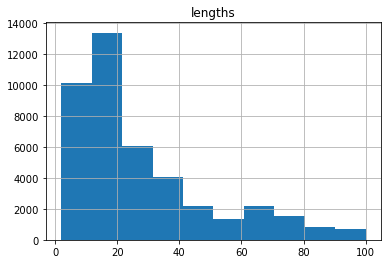

In [4]:
df.hist()